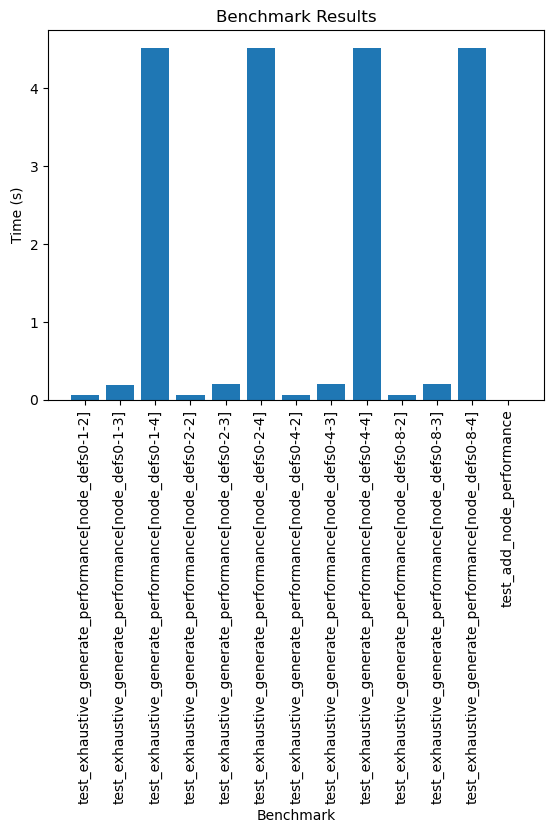

In [1]:
import json
import matplotlib.pyplot as plt
import scienceplots
import numpy as np

# plt.style.use(['science', 'no-latex'])

benchmark_file = '/raid6/homes/kierannp/projects/genGrouper/.benchmarks/Linux-CPython-3.9-64bit/0001_gpu_first.json'

# Load benchmark data
with open(benchmark_file) as f:
    data = json.load(f)

# Example: Plotting benchmark results
benchmarks = data['benchmarks']
names = [b['name'] for b in benchmarks]
times = [b['stats']['mean'] for b in benchmarks]

plt.bar(names, times)
plt.xlabel('Benchmark')
plt.ylabel('Time (s)')
plt.xticks(rotation=90)
plt.title('Benchmark Results')
plt.show()


No params
[2, 3, 4]
[2, 3, 4]
[2, 3, 4]
[2, 3, 4]


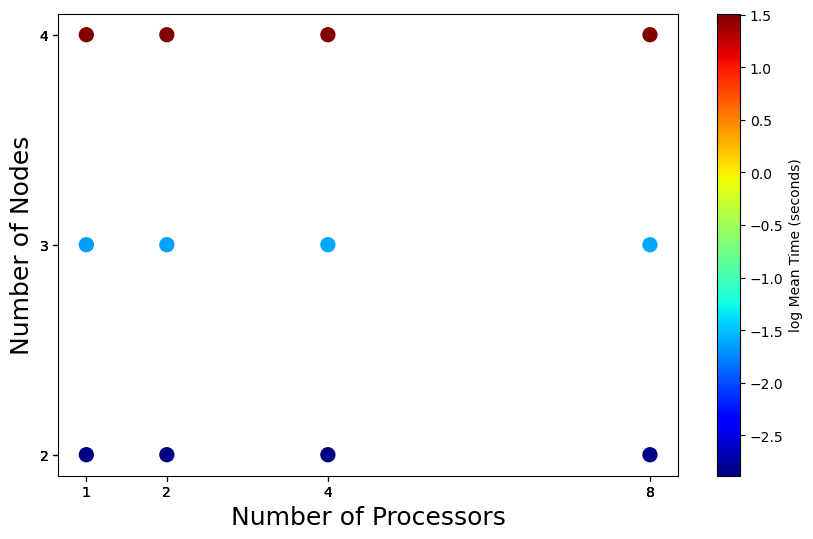

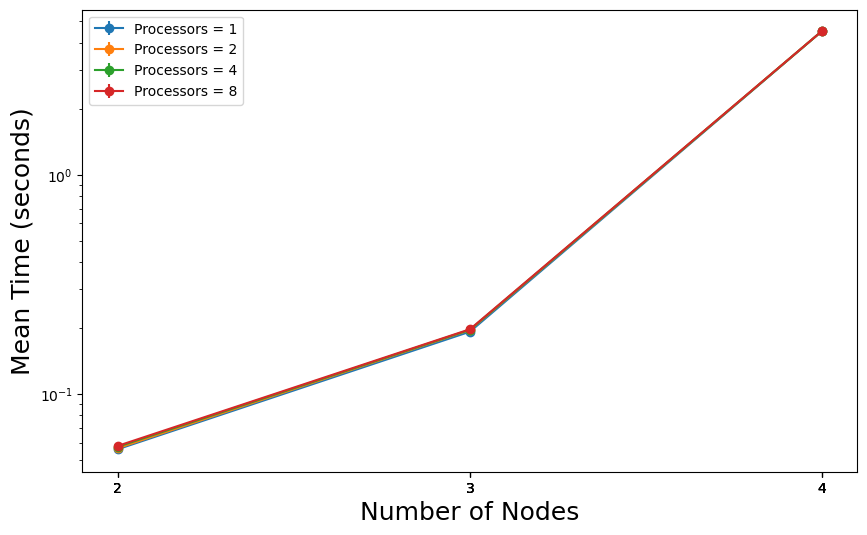

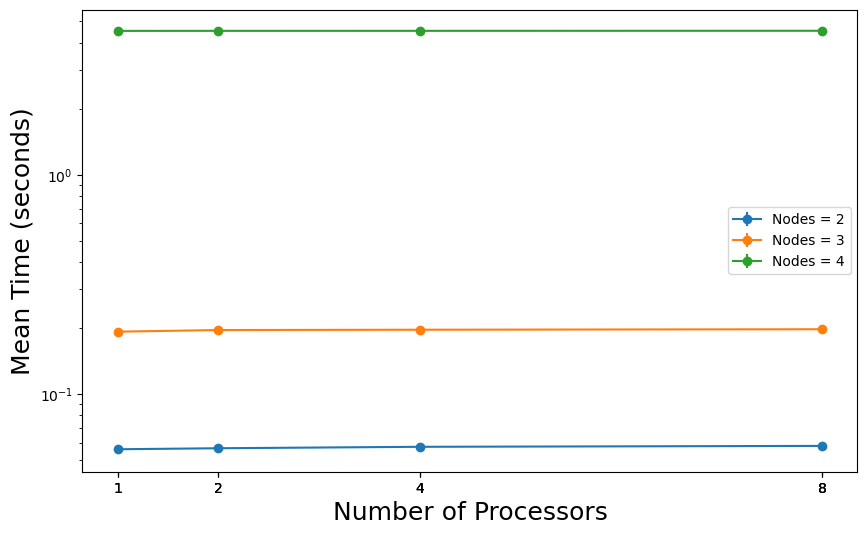

In [45]:
import json
import matplotlib.pyplot as plt

def plot_benchmark_performance(json_file):
    """
    Reads benchmark data from a JSON file and plots the effect of adding more processors and nodes, with error bars for stddev.
    
    :param json_file: Path to the benchmark JSON file.
    """
    # Load the benchmark data from the JSON file
    with open(json_file, 'r') as f:
        data = json.load(f)
    
    benchmarks = data['benchmarks']
    
    # Prepare lists to store extracted data
    processor_counts = []
    node_counts = []
    mean_times = []
    stddevs = []
    
    # Loop through each benchmark result and extract relevant info
    for benchmark in benchmarks:
        # Assuming processor and node count info is stored in 'extra_info'
        params = benchmark.get('params', {})
        if params is None:
            print('No params')
            continue
        n_processors = params.get('num_procs', 0)
        n_nodes = params.get('n_nodes', 0)
        mean_time = benchmark['stats']['mean']
        stddev = benchmark['stats']['stddev']  # Extracting the stddev for error bars
        
        processor_counts.append(n_processors)
        node_counts.append(n_nodes)
        mean_times.append(mean_time)
        stddevs.append(stddev)  # Store stddev values
    
    # Sort the data by processors and nodes
    sorted_data = sorted(zip(processor_counts, node_counts, mean_times, stddevs), key=lambda x: (x[0], x[1]))
    processor_counts, node_counts, mean_times, stddevs = zip(*sorted_data)

    plt.figure(figsize=(10, 6))
    plt.scatter(processor_counts, node_counts, c=np.log(mean_times), s=100, cmap='jet')
    plt.colorbar().set_label('log Mean Time (seconds)')
    plt.xticks(processor_counts)
    plt.yticks(node_counts)
    plt.xlabel('Number of Processors', fontsize=18)
    plt.ylabel('Number of Nodes', fontsize=18)


    # --- First plot: Performance vs Number of Nodes ---
    plt.figure(figsize=(10, 6))

    unique_procs = sorted(set(processor_counts))  # Unique processor counts for separating plots

    for proc in unique_procs:
        proc_data = [(n, m, s) for p, n, m, s in zip(processor_counts, node_counts, mean_times, stddevs) if p == proc]
        node_counts_for_proc = [d[0] for d in proc_data]
        mean_times_for_proc = [d[1] for d in proc_data]
        stddevs_for_proc = [d[2] for d in proc_data]
        
        print(node_counts_for_proc)
        # Plot with error bars (yerr for standard deviation)
        plt.errorbar(node_counts_for_proc, mean_times_for_proc, yerr=stddevs_for_proc, fmt='o-', label=f'Processors = {proc}')
    
    plt.xlabel('Number of Nodes', fontsize=18)
    plt.ylabel('Mean Time (seconds)', fontsize=18)
    plt.xticks(node_counts)
    plt.yscale('log')  # Log scale for better visualization
    plt.legend()
    plt.show()

    # --- Second plot: Performance vs Number of Processors ---
    plt.figure(figsize=(10, 6))

    unique_nodes = sorted(set(node_counts))  # Unique node counts for separating plots

    for node in unique_nodes:
        node_data = [(p, m, s) for p, n, m, s in zip(processor_counts, node_counts, mean_times, stddevs) if n == node]
        proc_counts_for_node = [d[0] for d in node_data]
        mean_times_for_node = [d[1] for d in node_data]
        stddevs_for_node = [d[2] for d in node_data]
        
        # Plot with error bars (yerr for standard deviation)
        plt.errorbar(proc_counts_for_node, mean_times_for_node, yerr=stddevs_for_node, fmt='o-', label=f'Nodes = {node}')
    
    plt.xlabel('Number of Processors', fontsize=18)
    plt.ylabel('Mean Time (seconds)', fontsize=18)
    plt.yscale('log')  # Log scale for better visualization
    plt.xticks(processor_counts)
    plt.legend()
    plt.show()

# Example usage:
# plot_benchmark_performance('/path/to/benchmark.json')


plot_benchmark_performance(benchmark_file)